In [1]:
### used the cleantable_Zina.csv 

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("/Users/ZINA/Desktop/IRONHACK/Week_4/first_project/data/clean/cleantable_Zina.csv")

In [2]:
print(df.columns)

Index(['name', 'year', 'city', 'region', 'cuisine', 'price', 'url', 'stars',
       'price_ordinal', 'price_mean', 'cuisine_original', 'major_city',
       'stars_n', 'Review_rating', 'Review_count'],
      dtype='object')


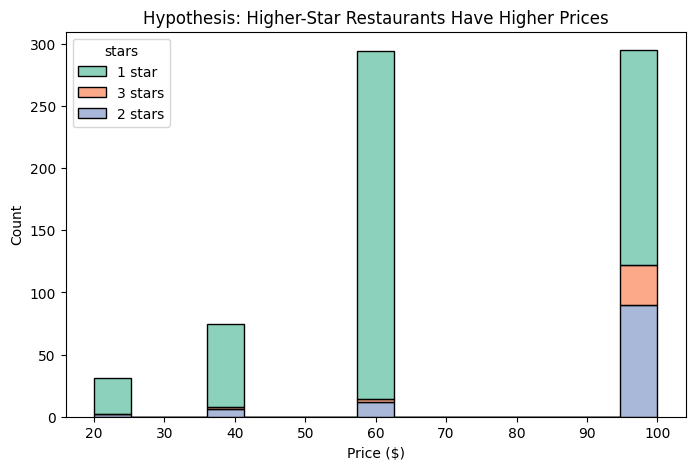

In [4]:
# Hypothesis: Higher-Star Restaurants Have Higher Prices

plt.figure(figsize=(8,5))
sns.histplot(data=df, x='price_mean', hue='stars', bins=15, palette='Set2', multiple='stack')
plt.title('Hypothesis: Higher-Star Restaurants Have Higher Prices')
plt.xlabel('Price ($)')
plt.ylabel('Count')
plt.show()

C:\Users\ZINA\AppData\Local\Temp\ipykernel_6856\2713431191.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='stars', palette='Set2')


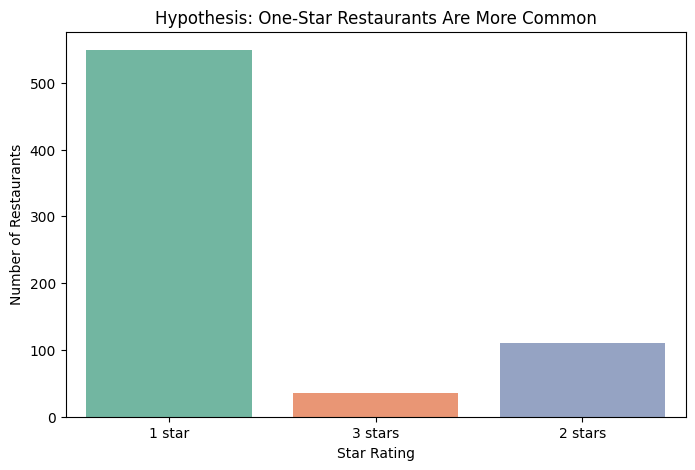

In [5]:
# Hypothesis: One-Star Restaurants Are More Common

plt.figure(figsize=(8,5))
sns.countplot(data=df, x='stars', palette='Set2')
plt.title('Hypothesis: One-Star Restaurants Are More Common')
plt.xlabel('Star Rating')
plt.ylabel('Number of Restaurants')
plt.show()

C:\Users\ZINA\AppData\Local\Temp\ipykernel_6856\428845957.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_price_region.index, y=avg_price_region.values, palette='Set2')


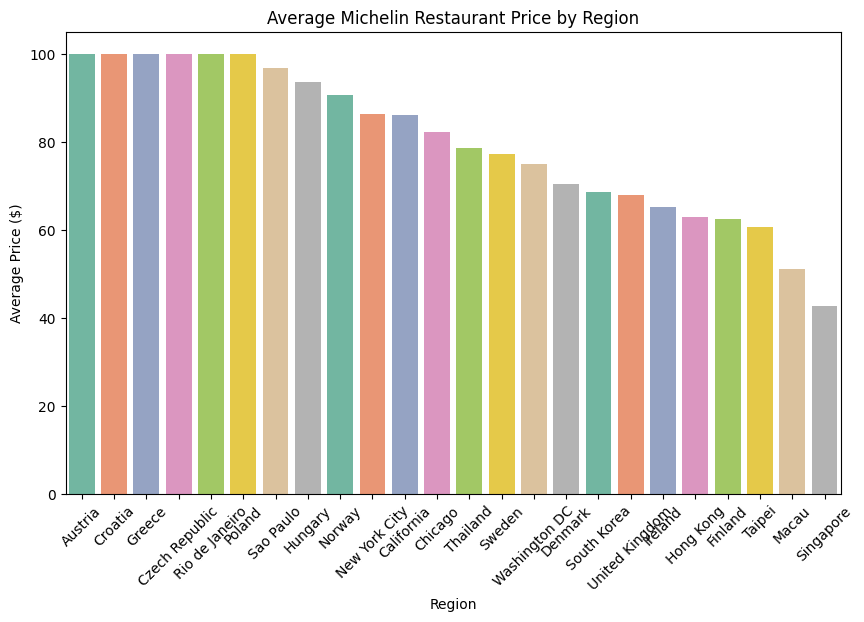

In [6]:
# Calculate average price per region
avg_price_region = df.groupby('region')['price_mean'].mean().sort_values(ascending=False)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x=avg_price_region.index, y=avg_price_region.values, palette='Set2')
plt.title('Average Michelin Restaurant Price by Region')
plt.xlabel('Region')
plt.ylabel('Average Price ($)')
plt.xticks(rotation=45)
plt.show()

C:\Users\ZINA\AppData\Local\Temp\ipykernel_6856\3015102386.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_price_cuisine.index, y=avg_price_cuisine.values, palette='Set3')


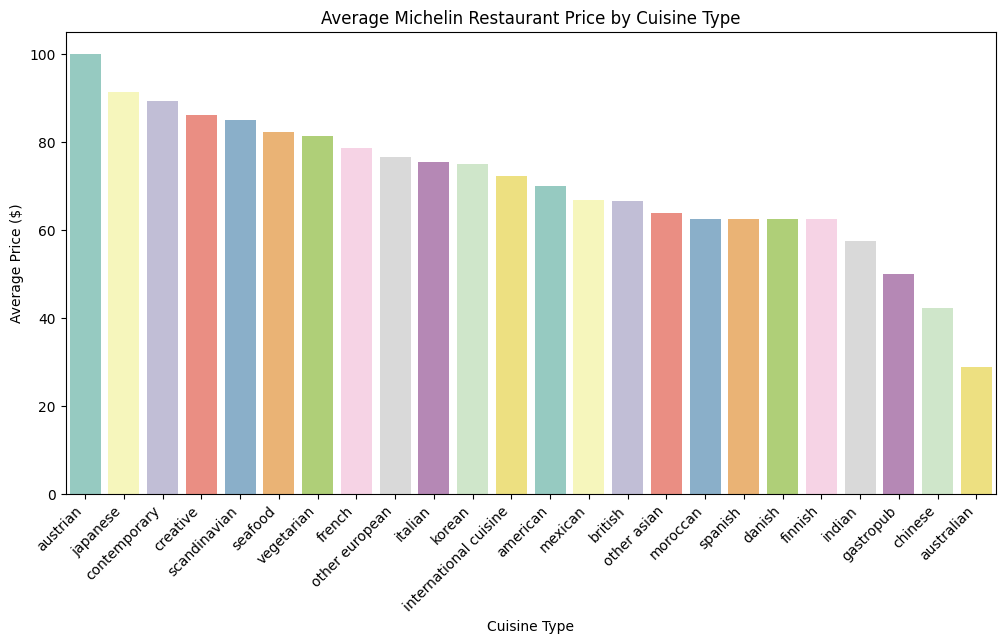

In [7]:
# Calculate average price per cuisine
avg_price_cuisine = df.groupby('cuisine')['price_mean'].mean().sort_values(ascending=False)

# Plot
plt.figure(figsize=(12,6))
sns.barplot(x=avg_price_cuisine.index, y=avg_price_cuisine.values, palette='Set3')
plt.title('Average Michelin Restaurant Price by Cuisine Type')
plt.xlabel('Cuisine Type')
plt.ylabel('Average Price ($)')
plt.xticks(rotation=45, ha='right')
plt.show()

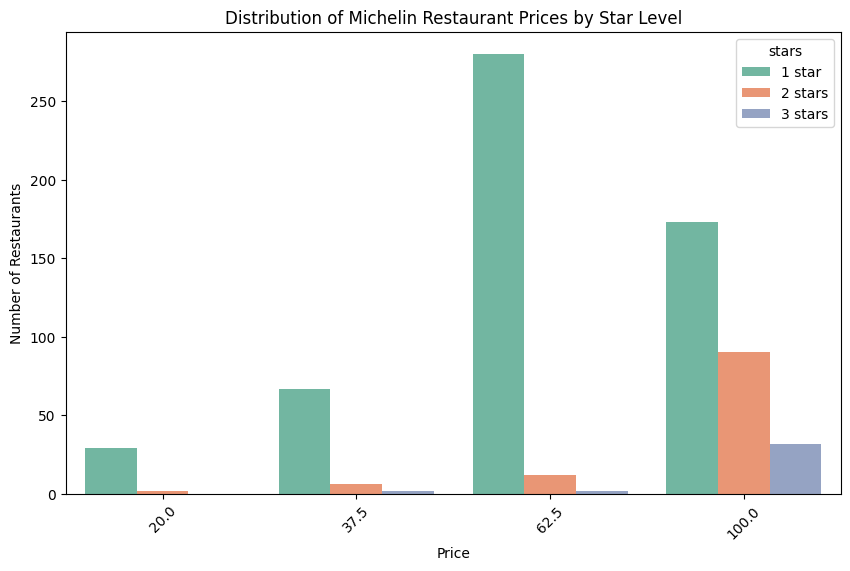

In [16]:
# Distribution of Michelin Restaurant Prices by Star Level

plt.figure(figsize=(10,6))
sns.countplot(data=df, x='price_mean', hue='stars', palette='Set2')
plt.title('Distribution of Michelin Restaurant Prices by Star Level')
plt.xlabel('Price')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=45)
plt.show()

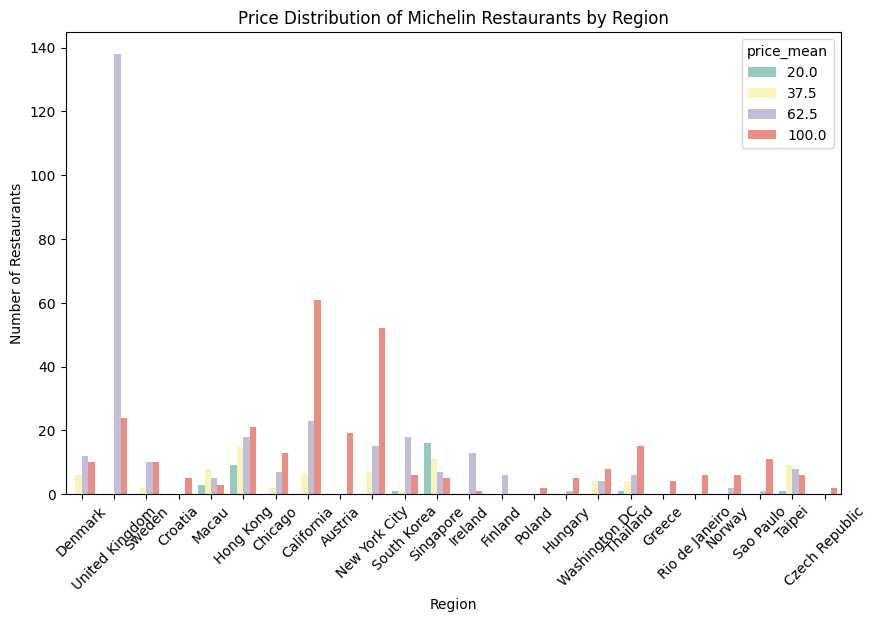

In [9]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='region', hue='price_mean', palette='Set3')
plt.title('Price Distribution of Michelin Restaurants by Region')
plt.xlabel('Region')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=45)
plt.show()

C:\Users\ZINA\AppData\Local\Temp\ipykernel_6856\518418672.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_price_stars, x='stars', y='price_mean', palette='Set2')


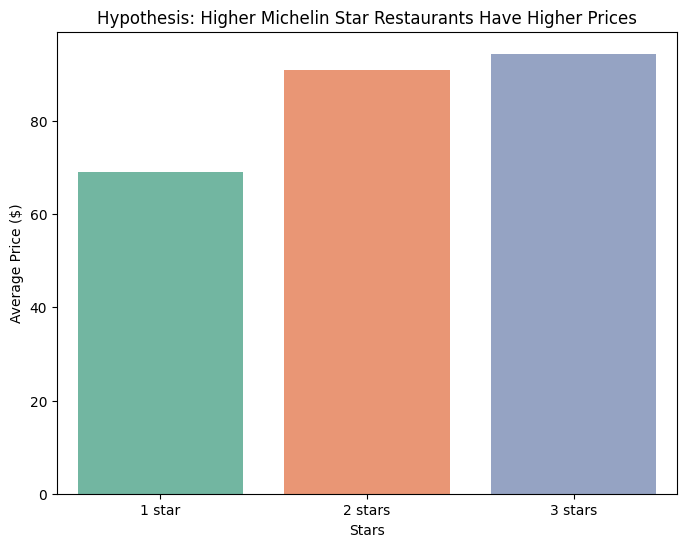

In [10]:
# Hypothesis: Higher Michelin Star Restaurants Have Higher Prices

avg_price_stars = df.groupby('stars')['price_mean'].mean().reset_index()

plt.figure(figsize=(8,6))
sns.barplot(data=avg_price_stars, x='stars', y='price_mean', palette='Set2')
plt.title('Hypothesis: Higher Michelin Star Restaurants Have Higher Prices')
plt.xlabel('Stars')
plt.ylabel('Average Price ($)')
plt.show()

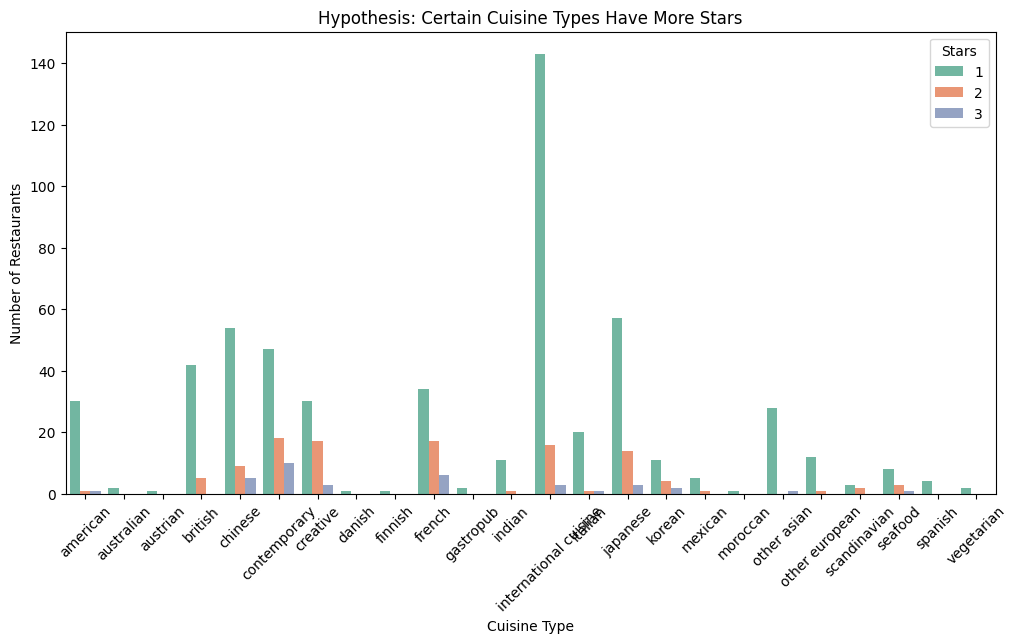

In [11]:
## Hypothesis: Certain Cuisine Types Have More Stars

plt.figure(figsize=(12,6))
# Count restaurants by cuisine and stars
cuisine_stars = df.groupby(['cuisine', 'stars_n']).size().reset_index(name='count')

sns.barplot(data=cuisine_stars, x='cuisine', y='count', hue='stars_n', palette='Set2')
plt.title('Hypothesis: Certain Cuisine Types Have More Stars')
plt.xlabel('Cuisine Type')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=45)
plt.legend(title='Stars')
plt.show()

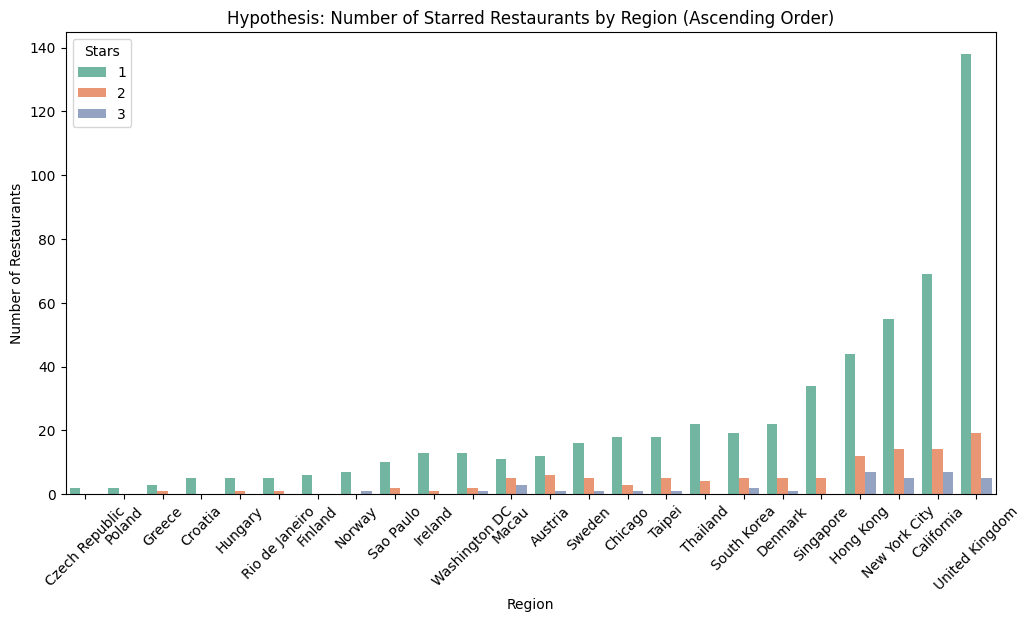

In [12]:
## Hypothesis: Some Regions Have More Starred Restaurants (total number of starred restaurants in ascending order)

plt.figure(figsize=(12,6))
# Count restaurants by region and stars
region_stars = df.groupby(['region', 'stars_n']).size().reset_index(name='count')

# Sum total restaurants per region
region_totals = region_stars.groupby('region')['count'].sum().reset_index()
region_totals = region_totals.sort_values('count')  # Ascending order

# Merge to keep order in plot
region_stars['region'] = pd.Categorical(region_stars['region'], categories=region_totals['region'], ordered=True)

sns.barplot(data=region_stars, x='region', y='count', hue='stars_n', palette='Set2')
plt.title('Hypothesis: Number of Starred Restaurants by Region (Ascending Order)')
plt.xlabel('Region')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=45)
plt.legend(title='Stars')
plt.show()


C:\Users\ZINA\AppData\Local\Temp\ipykernel_6856\4239056621.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_price_stars, x='stars_n', y='price_mean', palette='Set2')


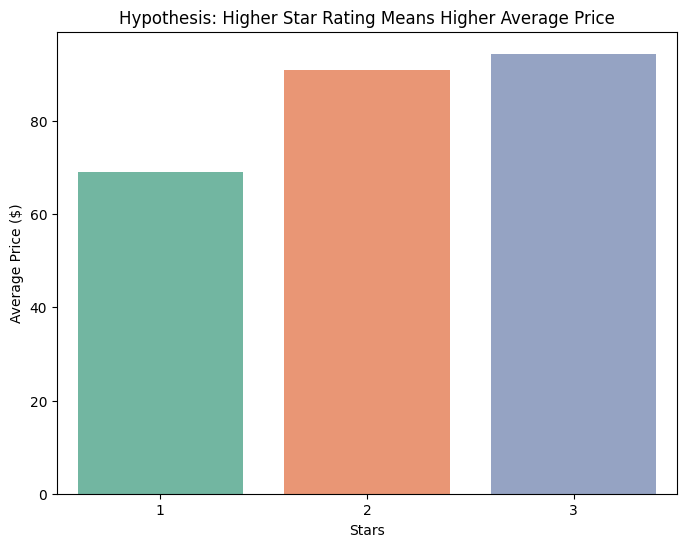

In [13]:
## Hypothesis: Higher Star Rating Means Higher Average Price

plt.figure(figsize=(8,6))
avg_price_stars = df.groupby('stars_n')['price_mean'].mean().reset_index()

sns.barplot(data=avg_price_stars, x='stars_n', y='price_mean', palette='Set2')
plt.title('Hypothesis: Higher Star Rating Means Higher Average Price')
plt.xlabel('Stars')
plt.ylabel('Average Price ($)')
plt.show()

C:\Users\ZINA\AppData\Local\Temp\ipykernel_6856\1778379172.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=region_counts, x='region', y='count', palette='Set2')


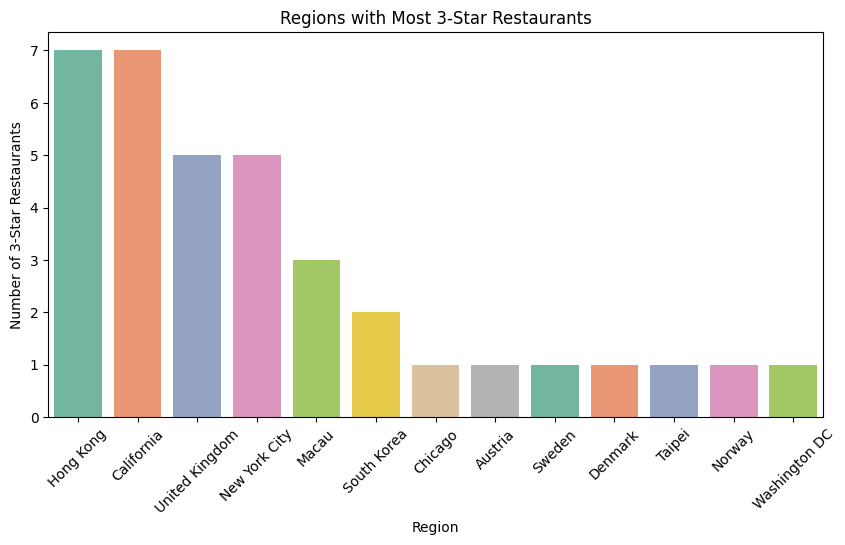

C:\Users\ZINA\AppData\Local\Temp\ipykernel_6856\1778379172.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=cuisine_counts, x='cuisine', y='count', palette='Set2')


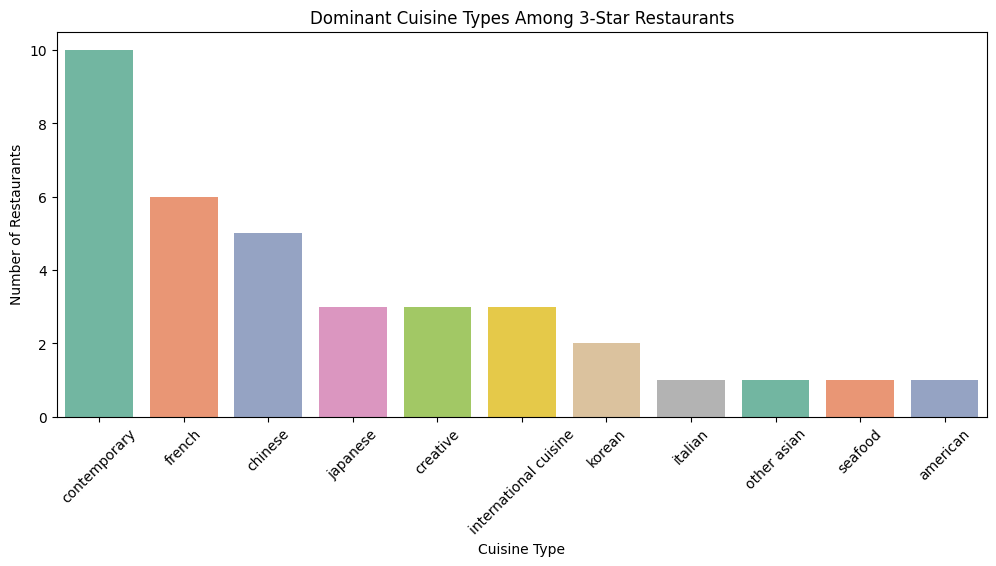

In [14]:
## Hypothesis: Some Regions Have More 3-Star Restaurants and Certain Cuisines Dominate

# Top regions with 3 stars
three_star = df[df['stars_n']==3]
region_counts = three_star['region'].value_counts().reset_index()
region_counts.columns = ['region', 'count']

plt.figure(figsize=(10,5))
sns.barplot(data=region_counts, x='region', y='count', palette='Set2')
plt.title('Regions with Most 3-Star Restaurants')
plt.xlabel('Region')
plt.ylabel('Number of 3-Star Restaurants')
plt.xticks(rotation=45)
plt.show()

# Dominant cuisine among 3-star restaurants
cuisine_counts = three_star['cuisine'].value_counts().reset_index()
cuisine_counts.columns = ['cuisine', 'count']

plt.figure(figsize=(12,5))
sns.barplot(data=cuisine_counts, x='cuisine', y='count', palette='Set2')
plt.title('Dominant Cuisine Types Among 3-Star Restaurants')
plt.xlabel('Cuisine Type')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=45)
plt.show()

C:\Users\ZINA\AppData\Local\Temp\ipykernel_6856\2143214954.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=stars_price_diff, x='stars_n', y='price_mean', palette='Set2')


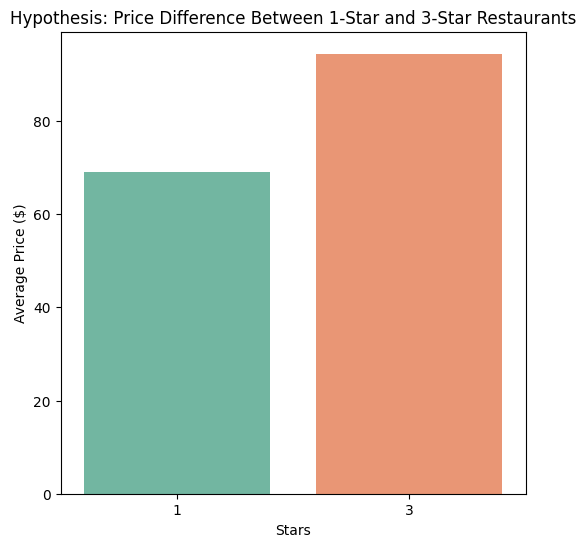

In [15]:
## Hypothesis: Price Difference Between 1-Star and 3-Star Restaurants

plt.figure(figsize=(6,6))
stars_price_diff = df[df['stars_n'].isin([1,3])].groupby('stars_n')['price_mean'].mean().reset_index()

sns.barplot(data=stars_price_diff, x='stars_n', y='price_mean', palette='Set2')
plt.title('Hypothesis: Price Difference Between 1-Star and 3-Star Restaurants')
plt.xlabel('Stars')
plt.ylabel('Average Price ($)')
plt.show()